<p align="center">
    <img src="./images/logo_beap.png">
</p>

### Renato Profeta <br> Guitars.AI <br> PhD Candidate / Researcher



# Basic Delay Effect

In [1]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/nECBR_Rc414" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

## Delay Line

 - Delay lines are fundamental blocks for many audio effects and sysnthesis algorithms.

In [2]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/js21zopxTvE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

<figure>
    <center>
        <img src="./images/05_01_delay_line.jpg">
    </center>
</figure>

A delay by M samples can be written as a multiplication of the signal x[n] with $z^{-m}$ in the z-domain:

$$\large
X(z) \cdot z^{-m} = \sum_{n=0}^{\infty} x(n) \cdot z^{-n-m} = \sum_{n=n'}^{\infty} x(n'-m) \cdot z^{-n'}$$

with n' = n + m for causal systems.

This delay can also be seen as a convolution with the following impulse response in the time domain:

$$\large
{h \left( n \right) = \left [\underbrace {0,0, .  .  .  ,} _{\text{m-zeros} } 1 \right ]} {}
$$
(meaning h(n)=1 for n=m, and 0 else), 
as convolution sum:

$$\large
x\left(n\right)*h\left(n\right)=\sum_{l=0}^{m} x\left(n-l\right) \cdot h\left(l\right)=x\left(n-m\right)
$$

## Delay Line Frequency Response

### Delay Operator M=3

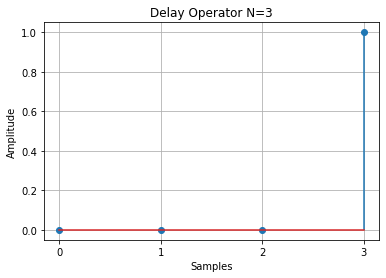

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Delay (shift) Operator
h=np.array([0,0,0,1])
plt.figure()
plt.title('Delay Operator N=3')
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.stem(h, use_line_collection=True)
plt.xticks(np.arange(0, 4, step=1))
plt.grid()


### Delay Frequency Response

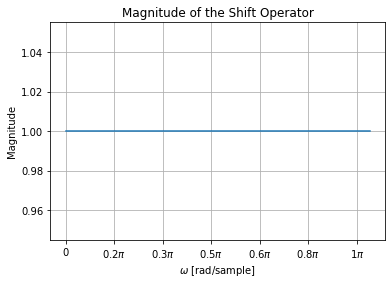

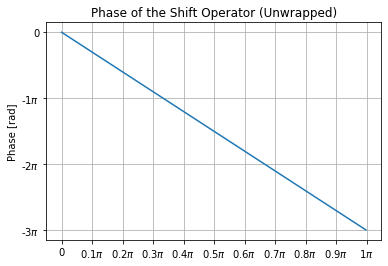

In [4]:
# Imports
import scipy.signal as signal
from matplotlib.ticker import FuncFormatter, MultipleLocator
# Frequency Response
omega, H= signal.freqz(h)

# Plot
plt.figure()
plt.plot(omega, abs(H))
plt.title('Magnitude of the Shift Operator')
plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Magnitude')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
plt.grid()

plt.figure()
plt.plot(omega, np.unwrap(np.angle(H)))
plt.title('Phase of the Shift Operator (Unwrapped)')
#plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Phase [rad]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.1*np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.grid()

## Basic Delay Effect

 - We can implement a basic delay effect based on a delay line, sume gain elements and some adders:

<figure>
    <center>
        <img src="./images/05_02_delay_effect.jpg">
    </center>
</figure>


In [5]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/WLKzYNf7ppM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></center>

### Basic Delay Effect Transfer Function H(z)

$$\large
H(z) = \frac{D+ (W - D \cdot F)\cdot z^{-m}}{1 - F \cdot z^{-m} }$$

where:

 - D = Dry Mix Gain
 - W = Wet Mix Gain
 - F = Feedback Gain

### Comb Filter

If we set the Feedback gain in the above Transfer Fucntion equal to zero, we end up with a feedback Comb Filter. 

Comb Filters can be used as building blocks of many digital audio effects. 

#### Comb Filter Frequency Response for m = 5 

In [6]:
# Define Parameters

D = 1    #  Dry Mix Gain
W = 0.8  #  Wet Mix Gain
F = 0    # Feedback Gain

In [7]:
# Filter Denominator and Nominator from Transfer Function

B = [D, 0, 0, 0, 0, W - D*F]
A = [1, 0, 0, 0 ,0, -F]

In [8]:
# Imports
import scipy.signal as signal

In [9]:
# Frequency Response
omega, H= signal.freqz(B,A, whole = True)

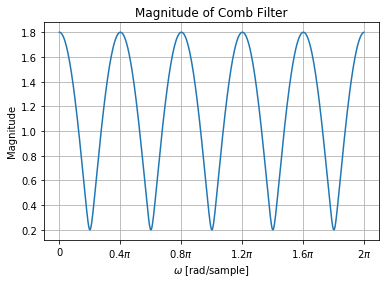

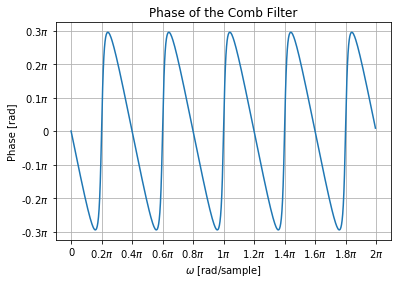

In [10]:
# Plot
plt.figure()
plt.plot(omega, abs(H))
plt.title('Magnitude of Comb Filter')
plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Magnitude')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.2g}$\pi$'.format(val/(np.pi)) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi*2))
plt.grid()

plt.figure()
plt.plot(omega, (np.angle(H)))
plt.title('Phase of the Comb Filter')
plt.xlabel('$\omega$ [rad/sample]')
plt.ylabel('Phase [rad]')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.2g}$\pi$'.format(val/(np.pi)) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2*np.pi))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_locator(MultipleLocator(base=0.1*np.pi))
plt.grid()

### Basic Delay Effect Audio Example

In [11]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/DHL69J-l0vo" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

In [12]:
# Imports
import librosa
import numpy as np
import IPython.display as ipd
from scipy import signal

In [13]:
# Basic Delay Function
def basic_delay(x, D, W, F, delay_time_s, fs):
    # x : input
    # D : Dry mix Gain
    # W : Wet mix Gain
    # F : Feedback Gain
    # delay_time_s : Delay time in Seconds
    # fs : sampling frequency
    # ------------------------------------------
    # returns filtered signal
    
    N = int(fs * delay_time_s)
    
    B = np.zeros(N)
    B[0] = D
    B[-1] = W - D*F
    
    A = np.zeros(N)
    A[0]=1
    A[-1]=-F
    
    return signal.lfilter(B, A, x)

In [14]:
# Input Signal
tone_440 = librosa.tone(440, sr=24000, length=8000)
tone_440[:1024]*=np.linspace(0,1,1024)
tone_440[-1024:]*=np.linspace(1,0,1024)

In [15]:
# Prepare output with zeros for 6 seconds duration
delay_input = np.zeros(24000*6)
delay_input[:tone_440.size]=tone_440

# Listen to Input testing signal
ipd.Audio(delay_input, rate=24000)

In [16]:
# Basic Delay
output = basic_delay(delay_input, D=1, W=1, F = 0.5, delay_time_s=0.5, fs = 24000 )

In [17]:
# Listen to output
ipd.Audio(output, rate=24000)

### Delay Line as a Circular Buffer

 - Many times a delay line is implemented in software using a ***Circular Buffer***.
 - A Circular Buffer is a type of high performance First In First Out (FIFO) queue.
 - "Circular addressing uses pointer manipulation to add the new samples to the buffer by overwriting the oldest available samples hence reusing the memory buffer. When the pointer reaches the last location of the delay line it needs to wrap back to the beginning of the line. This would normally involve some amount of software overhead. When circular addressing is used, the pointer automatically wraps back to the top whenever the bottom of the buffer is reached. As a consequence, the memory locations appear to be tied together in a circular manner hence the name ‘circular buffer’. Most digital signal processors implement circular buffering in hardware in order to conserve memory and minimize software overhead." - *Circular Buffering on TMS320C6000, SPRA645A, page 2.*
 - Also called Ring Buffer.

In [18]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/Oh1_p4lC5rI" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

#### Circular Buffer and Basic Delay Effect Python Implementation (Non-Pythonic Style) 

In [19]:
# Parameters

fs = 24000                   # Sampling Frequency
delay_time_s = 0.5           # Delay Time in Seconds
N = int(fs * delay_time_s)   # Delay in number of Samples
buffer = np.zeros(N)         # Buffer for delay filled with zeros
ptr=0                        # Pointer

def circular_buffer(x):
    global buffer, ptr,N
    y= buffer[ptr]
    buffer[ptr]=x
    ptr+=1
    '''if (ptr >=N):
        ptr-= N'''
    ptr = ptr % N
    return y

def basic_delay(x, D=1, W=1, F=0.5):
    global buffer,ptr
    after_delay=0
    a=[]
    for i in range(x.size):
        before_delay=x[i]+after_delay*F
        after_delay=circular_buffer(before_delay)
        y=after_delay*W+x[i]*D
        a.append(y)
    return a

In [20]:
delay_ouput=basic_delay(delay_input)

In [21]:
# Listen to output
ipd.Audio(delay_ouput, rate=24000)

## Basic Delay Effect Implementation on C5515 ezDsp Board

In [22]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/VFsCRSHtBW4" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>

basic_delay.c
```c
// Buffer for a maximum delay of MAX_BUFFER_LENGTH samples.
signed int delay_buffer[MAX_BUFFER_LENGTH]; 

signed int seconds_to_samples(double seconds, unsigned short sampling_rate)
{
	unsigned short samples = MAX_BUFFER_LENGTH;
	if (seconds > 0.5)
	{
		samples = MAX_BUFFER_LENGTH;
	}
	else
	{
		samples = seconds * sampling_rate;
	}
	return samples;
}

signed int delayline(signed int x, double delay_seconds, unsigned short sampling_rate)
{
	static unsigned short index = 0;
	signed int y = delay_buffer[index];
	delay_buffer[index++] = x;
	index %= seconds_to_samples(delay_seconds, sampling_rate);
	return y;
}

signed int basic_delay_effect(signed int x, double dry_mix, double wet_mix, double feedback, double delay_seconds, unsigned short sampling_rate)
{
	static signed int before_delay = 0;
	static signed int after_delay = 0;

	before_delay = x + after_delay*feedback;
	after_delay = delayline(before_delay, delay_seconds,sampling_rate);
	return after_delay*wet_mix + x*dry_mix;
}
```

## Basic Delay Effect C5515 ezDsp Board Demo

In [23]:
%%html
<center>
<iframe width="560" height="315" src="https://www.youtube.com/embed/hR5o7PpBYSQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</center>